In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

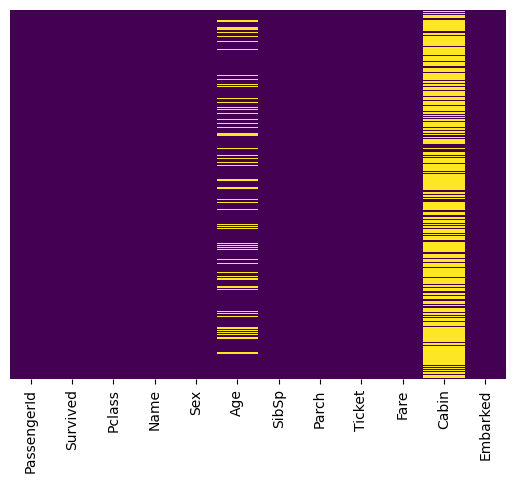

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

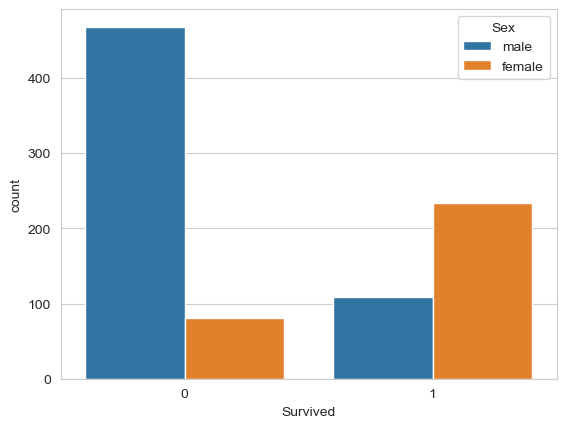

In [27]:
train['Pclass'] = train['Pclass'].astype(str)
sns.countplot(x='Survived',hue='Sex',data=train)

C:\Users\PMR\AppData\Local\Temp\ipykernel_13464\2747699129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

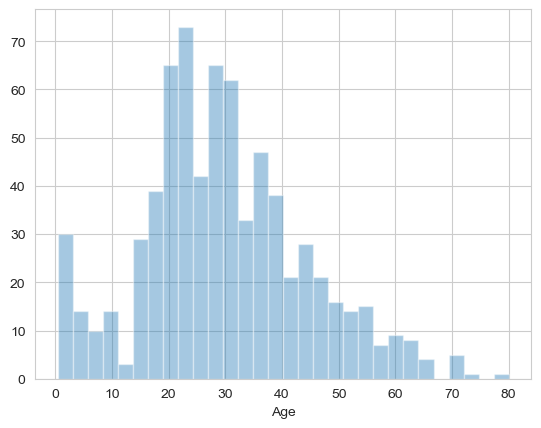

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<Axes: ylabel='Frequency'>

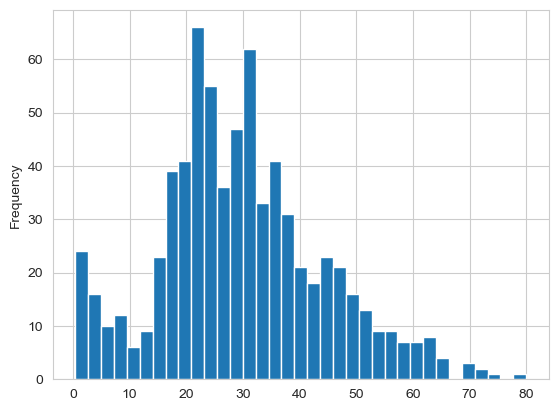

In [15]:
train['Age'].plot.hist(bins=35)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

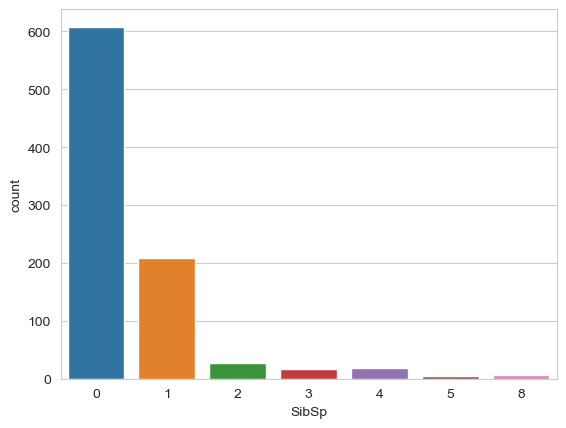

In [20]:
sns.countplot(x='SibSp',data=train)

<Axes: >

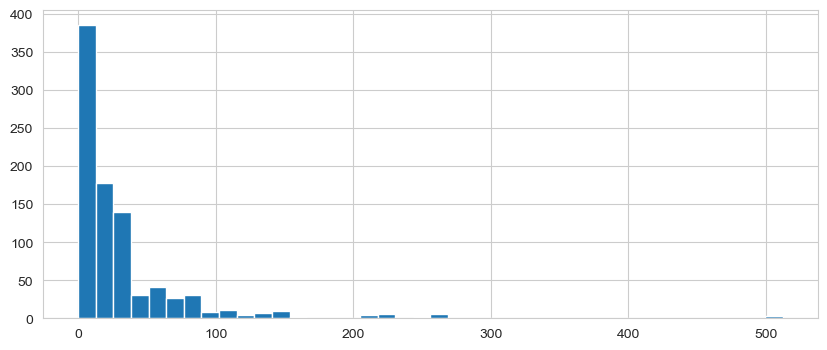

In [23]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [24]:
import cufflinks as cf

In [25]:
cf.go_offline()

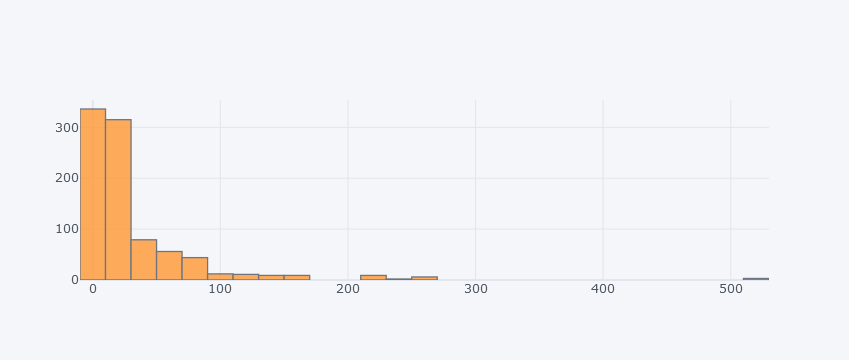

In [26]:
train['Fare'].iplot(kind='hist',bins=30)

**Get average age per class**

In [34]:
grouped = train.groupby('Pclass')

In [37]:
grouped['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

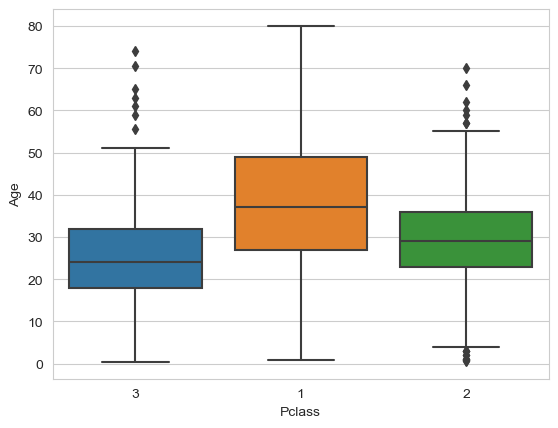

In [39]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [58]:
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

<Axes: >

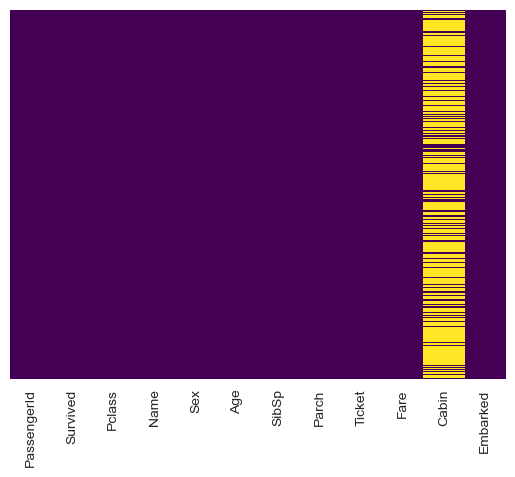

In [61]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')